**Time Series Forecasting**

The goal is to predict future values of a time series based on its past behaviour. 
I want to predict what the demand for bike rentals would have been in 2020 if there had been no COVID-19 pandemic. In order to achieve this goal I am using data from 2017 and 2018 to train the machine and then data from 2019 to test it, this will help us to find best model with high accuracy. Using that model we can predict 2020.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import glob

# Get a list of all CSV files in the directory
file_list = glob.glob('F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\*.csv')


# Create an empty list to hold the DataFrames
df_list = []

# Loop through the CSV files and read them into DataFrames
for file in file_list:
    # Check if the file name contains the years 2017, 2018, or 2019
    if  '2017' in file or '2018' in file or '2019' in file:
        # Read the CSV file into a DataFrame and rename the columns
        print(file)
        df = pd.read_csv(file)
        df = df.rename(columns={'ride_id': 'Ride ID', 'rideable_type': 'Rideable Type',
                                'started_at': 'Start date', 'ended_at': 'End date',
                                'start_station_name': 'Start station', 'start_station_id': 'Start station number',
                                'end_station_name': 'End station', 'end_station_id': 'End station number',
                                'start_lat': 'Start station latitude', 'start_lng': 'Start station longitude',
                                'end_lat': 'End station latitude', 'end_lng': 'End station longitude',
                                'Duration': 'Duration (seconds)', 'Bike number': 'Bike Number',
                                'member_casual': 'Member type'})
        #df = df[['Start date', 'End date', 'Member Type']]  # Select only the columns you need
        df_list.append(df)

# Concatenate the DataFrames
df = pd.concat(df_list, ignore_index=True)

F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\2017Q1-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\2017Q2-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\2017Q3-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\2017Q4-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201801_capitalbikeshare_tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201802-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201803-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201804-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201805-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201806-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201807-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201808-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201809-capitalbikeshare

step 1: prepare the data 

In [3]:
df.shape

(10698878, 9)

In [4]:
#to check for duplicated values 
duplicated_mask = df.duplicated(keep= 'first')
duplicated_rows = df[duplicated_mask]
duplicated_rows

,Duration (seconds),Start date,End date,Start station number,Start station,End station number,End station,Bike Number,Member type
7141608,790,2018-12-01 00:00:44,2018-12-01 00:13:54,31203,14th & Rhode Island Ave NW,31116,California St & Florida Ave NW,W21477,Member
7141609,771,2018-12-01 00:00:55,2018-12-01 00:13:46,31203,14th & Rhode Island Ave NW,31116,California St & Florida Ave NW,W22810,Member
7141610,775,2018-12-01 00:00:55,2018-12-01 00:13:51,31203,14th & Rhode Island Ave NW,31116,California St & Florida Ave NW,W21144,Member
7141611,750,2018-12-01 00:01:08,2018-12-01 00:13:39,31203,14th & Rhode Island Ave NW,31116,California St & Florida Ave NW,W23321,Member
7141612,146,2018-12-01 00:02:45,2018-12-01 00:05:11,31124,14th & Irving St NW,31102,11th & Kenyon St NW,W22304,Member
...,...,...,...,...,...,...,...,...,...
7160322,434,2018-12-04 10:24:35,2018-12-04 10:31:50,31638,1st & H St NW,31603,1st & M St NE,W23394,Member
7160324,412,2018-12-04 10:24:54,2018-12-04 10:31:46,31638,1st & H St NW,31603,1st & M St NE,W21044,Member
7160325,461,2018-12-04 10:24:56,2018-12-04 10:32:38,31282,16th & R St NW,31117,15th & Euclid St NW,E00144,Member
7160326,129,2018-12-04 10:24:57,2018-12-04 10:27:07,31415,Georgia Ave & Kennedy St NW,31407,14th St & Colorado Ave NW,W01220,Member


In [5]:
#we have 18441 duplicated rows so to get unique rows we can drop them
df = df.drop_duplicates(keep='first')

In [6]:
#I am chosing these two features to go with them in machine learning step 
df = df[['Start date', 'Member type']]

In [7]:
df.head()

,Start date,Member type
0,2017-01-01 00:00:41,Member
1,2017-01-01 00:06:53,Casual
2,2017-01-01 00:07:10,Casual
3,2017-01-01 00:07:22,Casual
4,2017-01-01 00:07:36,Casual


In [8]:
#rename columns in bikes ds
for col in df.columns:
    df.rename(columns={col:col.lower().replace(" ","_")},inplace=True)

df.head(0)

,start_date,member_type


In [9]:
df.head()

,start_date,member_type
0,2017-01-01 00:00:41,Member
1,2017-01-01 00:06:53,Casual
2,2017-01-01 00:07:10,Casual
3,2017-01-01 00:07:22,Casual
4,2017-01-01 00:07:36,Casual


In [10]:
#to convert the type from object to datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df.head()

,start_date,member_type
0,2017-01-01 00:00:41,Member
1,2017-01-01 00:06:53,Casual
2,2017-01-01 00:07:10,Casual
3,2017-01-01 00:07:22,Casual
4,2017-01-01 00:07:36,Casual


In [11]:
#some of values in this column are with capital letter started and some are with lower letter to fix it  
df['member_type'] = df['member_type'].replace({'Member': 'member', 'Casual': 'casual'})

In [12]:
#to get the total number of rides per day I am going to use member type 
casual = df[df['member_type'] == 'casual'].groupby(pd.Grouper(key = 'start_date', freq = 'MS')).count().rename(columns={'member_type': 'casual_cnt'}).reset_index()
casual = casual[['start_date', "casual_cnt"]]
casual.head()

,start_date,casual_cnt
0,2017-01-01,21870
1,2017-02-01,44022
2,2017-03-01,52184
3,2017-04-01,124240
4,2017-05-01,97763


In [13]:
#to get the total number of rides per day I am going to use member type 
member = df[df['member_type'] == 'member'].groupby(pd.Grouper(key = 'start_date', freq = 'MS')).count().rename(columns={'member_type': 'member_cnt'}).reset_index()
member = member[['start_date', 'member_cnt']]
member.head()

,start_date,member_cnt
0,2017-01-01,152934
1,2017-02-01,182281
2,2017-03-01,193219
3,2017-04-01,241750
4,2017-05-01,241914


In [14]:
# to join these two new datasets 
df= pd.merge(member,casual, how='outer', on = "start_date")
df.head()

,start_date,member_cnt,casual_cnt
0,2017-01-01,152934,21870
1,2017-02-01,182281,44022
2,2017-03-01,193219,52184
3,2017-04-01,241750,124240
4,2017-05-01,241914,97763


In [15]:
#to get the total count
df = df.assign(total = df['member_cnt'] + df['casual_cnt'])
df.head()

,start_date,member_cnt,casual_cnt,total
0,2017-01-01,152934,21870,174804
1,2017-02-01,182281,44022,226303
2,2017-03-01,193219,52184,245403
3,2017-04-01,241750,124240,365990
4,2017-05-01,241914,97763,339677


In [16]:
# Check for non-numeric columns
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"{col} is not numeric")

start_date is not numeric


In [17]:
#have to convert each column to numeric values 
df['year'] = df['start_date'].dt.year
df['quarter'] = df['start_date'].dt.quarter
df['month'] = df['start_date'].dt.month
df['day'] = df['start_date'].dt.day
df['day_of_week'] = df['start_date'].dt.dayofweek
df["weekend"] = df['day_of_week'] > 4
df["weekend"] = df["weekend"].astype(int)

In [18]:
# Check for non-numeric columns
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"{col} is not numeric")

start_date is not numeric


In [19]:
df.head(7)

,start_date,member_cnt,casual_cnt,total,year,quarter,month,day,day_of_week,weekend
0,2017-01-01,152934,21870,174804,2017,1,1,1,6,1
1,2017-02-01,182281,44022,226303,2017,1,2,1,2,0
2,2017-03-01,193219,52184,245403,2017,1,3,1,2,0
3,2017-04-01,241750,124240,365990,2017,2,4,1,5,1
4,2017-05-01,241914,97763,339677,2017,2,5,1,0,0
5,2017-06-01,279723,119028,398751,2017,2,6,1,3,0
6,2017-07-01,258919,138761,397680,2017,3,7,1,5,1


In [20]:
df.tail()

,start_date,member_cnt,casual_cnt,total,year,quarter,month,day,day_of_week,weekend
31,2019-08-01,308767,51277,360044,2019,3,8,1,3,0
32,2019-09-01,317246,42979,360225,2019,3,9,1,6,1
33,2019-10-01,303048,34504,337552,2019,4,10,1,1,0
34,2019-11-01,206459,17053,223512,2019,4,11,1,4,0
35,2019-12-01,150839,11039,161878,2019,4,12,1,6,1


In [21]:
#we don't need start_date column anymore 
df = df[['year', 'quarter', 'month', 'day_of_week', 'weekend', 'total' ]]
df.head()

,year,quarter,month,day_of_week,weekend,total
0,2017,1,1,6,1,174804
1,2017,1,2,2,0,226303
2,2017,1,3,2,0,245403
3,2017,2,4,5,1,365990
4,2017,2,5,0,0,339677


In [22]:
#to get seasons from months 

#a function to map month numbers to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 1
    elif month in [3, 4, 5]:
        return 2
    elif month in [6, 7, 8]:
        return 3
    else:
        return 4

# Create a new categorical column called "seasons"
df['season'] = df['month'].apply(get_season).astype(int)

In [23]:
df.head()

,year,quarter,month,day_of_week,weekend,total,season
0,2017,1,1,6,1,174804,1
1,2017,1,2,2,0,226303,1
2,2017,1,3,2,0,245403,2
3,2017,2,4,5,1,365990,2
4,2017,2,5,0,0,339677,2


In [24]:
df.tail()

,year,quarter,month,day_of_week,weekend,total,season
31,2019,3,8,3,0,360044,3
32,2019,3,9,6,1,360225,4
33,2019,4,10,1,0,337552,4
34,2019,4,11,4,0,223512,4
35,2019,4,12,6,1,161878,1


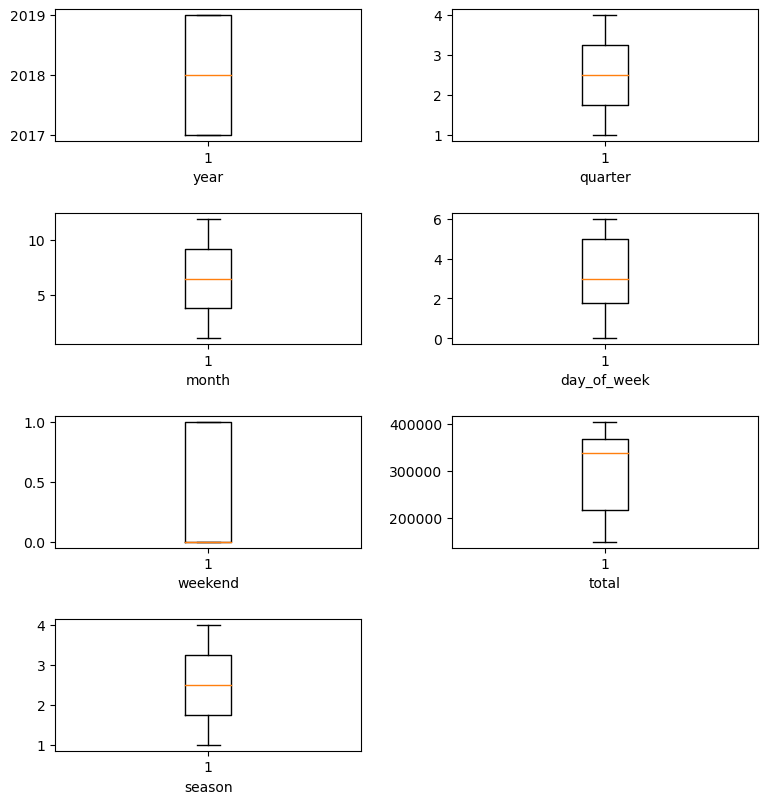

In [25]:
#to check for outliers 

fig = plt.figure(figsize=(12,10))
count = 0
for i in range(4):
    for j in range(2):
        if count == 7:
            break
        plt.subplot2grid((5,3),(i,j))
        plt.boxplot(df[df.columns[count]])
        plt.xlabel(df.columns[count])
        plt.tight_layout(pad=2)
        count += 1


C:\Users\Fariha\AppData\Local\Temp\ipykernel_9764\3058146780.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cor, dtype=np.bool))


<AxesSubplot:>

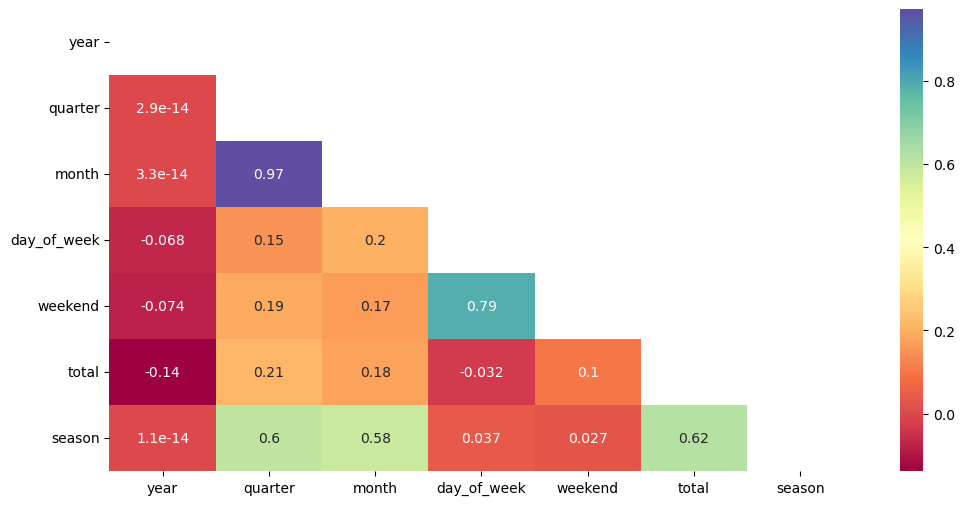

In [26]:
#check for high correlations 
cor=df.corr()
mask = np.triu(np.ones_like(cor, dtype=np.bool))
fig=plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Spectral', mask=mask , annot=True)

there is a high correlation between quarter and month 

In [27]:
#to get the final 
df = df[['year', 'season', 'month', 'total' ]]
df.head()

,year,season,month,total
0,2017,1,1,174804
1,2017,1,2,226303
2,2017,2,3,245403
3,2017,2,4,365990
4,2017,2,5,339677


step 2: machine learning 

In [28]:
# Split the data into training and testing sets based on the year
train_data = df.loc[df['year'] < 2019]
test_data = df.loc[df['year'] == 2019]

# Verify the shape of the training and testing sets
print('Training set shape:', train_data.shape)
print('Testing set shape:', test_data.shape)

Training set shape: (24, 4)
Testing set shape: (12, 4)


In [29]:
# Define the features and target variable for the linear regression model
X_train = train_data.drop(['total'], axis=1)
y_train = train_data['total']
X_test = test_data.drop(['total'], axis=1)
y_test = test_data['total']

In [30]:
# min-max scaling, which scales the features to a fixed range (usually between 0 and 1)
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


1. Liner Regression Model

In [31]:
#import
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict the bike rental demand on the test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (Linear Regression):', mse)
# evaluate with r2_score
Accuracy = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %Accuracy)

Mean Squared Error (Linear Regression): 3730338097.4166074
Accuracy of the model is 46.81


2. Decession Tree Regressor

In [32]:
from sklearn.tree import DecisionTreeRegressor
# Train a decision tree regression model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

# Predict the bike rental demand on the test set
y_pred = dt_model.predict(X_test_scaled)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (Decision Tree Regression):', mse)
# evaluate with r2_score
Accuracy = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %Accuracy)

Mean Squared Error (Decision Tree Regression): 874992733.5
Accuracy of the model is 87.52


3. Random Forest Regressor Model

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rf_model = RandomForestRegressor()

# train the model
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Calculate the Mean Squared Error on the testing set
rf_mse = mean_squared_error(y_test, y_pred)
print("Random Forest Regression Testing MSE: ", rf_mse)
# evaluate with r2_score
Accuracy = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %Accuracy)

Random Forest Regression Testing MSE:  681021621.318575
Accuracy of the model is 90.29


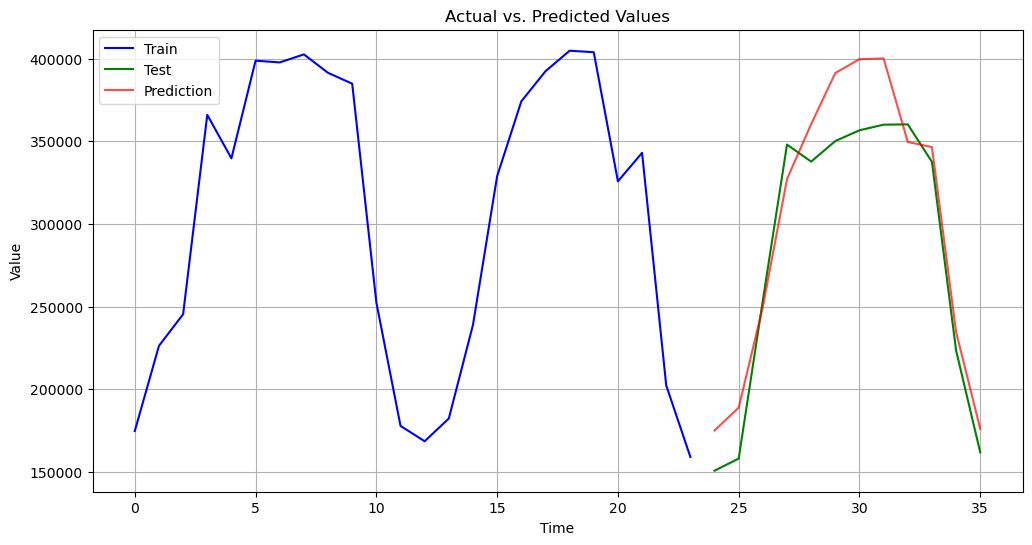

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create a DataFrame for the predicted values
y_pred_df = pd.DataFrame({'Prediction': y_pred}, index=y_test.index)

# Plot the training, testing, and predicted values
y_train.plot(ax=ax, label='Train', color='blue')
y_test.plot(ax=ax, label='Test', color='green')
y_pred_df.plot(ax=ax, label='Predictions', color='red', alpha=0.7)

# Add a title and axis labels
ax.set_title('Actual vs. Predicted Values')
ax.set_xlabel('Time')
ax.set_ylabel('Value')

# Add grid lines
ax.grid(True)

# Add a legend
ax.legend()

plt.show()


4. Support Vectore Model

In [35]:
from sklearn.svm import SVR
# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, y_pred)
print("Support Vector Regression Testing MSE: ", svr_mse)
svr_accuracy = r2_score(y_test, y_pred)*100
print("Accuracy: ", svr_accuracy)

Support Vector Regression Testing MSE:  9623438080.795061
Accuracy:  -37.21745244924026


5. Gradient Boosting Regression

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train_scaled, y_train)
y_pred = gbr_model.predict(X_test_scaled)
gbr_mse = mean_squared_error(y_test, y_pred)
print("Gradient Boosting Regression Testing MSE: ", gbr_mse)
gbr_accuracy = r2_score(y_test, y_pred)*100
print("Accuracy: ", gbr_accuracy)

Gradient Boosting Regression Testing MSE:  794106903.824601
Accuracy:  88.67708968454617


We have found that Random Forest Model with 90% accuracy is our best model, now we can use the model to predict 2020.